In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
data_train = pd.read_csv('optdigits.tra', header = None)
data_test = pd.read_csv("optdigits.tes",header=None)

In [39]:
class Data_Preprocess:
    def __init__(self):
        self.features=[]
    def fit(self,data):
        for i in range(data.shape[1]):
            if np.any(data[:,i]):
                self.features.append(i)
        return data[:,self.features]
    def transform(self,data):
        return data[:,self.features]

def plot_data(data,labels):
    plt.clf()
    color=list(colors.TABLEAU_COLORS.keys())
    plt.figure(figsize=(20,20))
    for x,y,label in zip(data[:,0],data[:,1],labels):
        plt.scatter(x,y,c=color[label],label=label)
        plt.annotate(label,(x,y))
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")

    h , l = plt.gca().get_legend_handles_labels()
    legend=[]
    for h,l in zip(h,l):
        legend.append((l,h))
    legend=sorted(legend,key=lambda x:x[0])
    by_label = OrderedDict(legend)
    plt.legend(by_label.values(), by_label.keys())
    plt.show()
data_Preprocess=Data_Preprocess()
x_train=data_train.iloc[:,:-1].values
px_train=data_Preprocess.fit(x_train)
y_train=data_train.iloc[:,-1].values
x_test=data_test.iloc[:,:-1].values
y_test=data_test.iloc[:,-1].values

 <b>Question 1</b> : Implement the k-means clustering algorithm yourself in python. Cluster the training set k=10 and k=20 clusters. Run your clustering algorithm 10 times and report the reconstruction errors on training and test datasets for each run and for each value of k=10 and k=20 (number of clusters). 

In [40]:
#Select random data points for k centroids 
#Initialiize cluster results
#Calculate distance between data point and cluster centroids
#Select the centroid with least distance
#Recalculate cluster centroids
class K_Means:
    def __init__(self,k, no_of_i):
        self.k=k
        self.no_of_i=no_of_i
        self.means=[]
    def fit(self,data_t): 
        indices=np.random.choice(data_t.shape[0],size=self.k)
        self.means=data_t[indices]
        self.rec_errors=[0]*self.no_of_i
        clusters=np.zeros([len(data_t)])
        for i in range(self.no_of_i):
            error=0
            for j in range(data_t.shape[0]):
                distances=np.linalg.norm(data_t[j]-self.means,axis=1)
                error+=np.min(distances)
                clusters[j]=np.argmin(distances)
            for j in range(self.k):
                vectors=data_t[clusters==j]
                self.means[j]=vectors.mean(axis=0)
            self.rec_errors[i]=error
        return clusters

In [41]:
print("K-Means clustering with K=10")
kmeans_10=K_Means(10,10)
clusters_10=kmeans_10.fit(x_train)
print("Reconstruction errors:",kmeans_10.rec_errors)
print("\n\nK-Means clustering with K=20")
kmeans_20=K_Means(20,10)
cluster_20=kmeans_20.fit(x_train)
print("Reconstruction errors:",kmeans.rec_errors)

K-Means clustering with K=10
Reconstruction errors: [130552.38567917404, 105969.53675121783, 102287.84038100435, 100636.49865795228, 99123.1711865292, 98347.31802959616, 98079.01837161636, 97849.42257640799, 97728.54398112807, 97688.23551441936]


K-Means clustering with K=20
Reconstruction errors: [134341.46418169714, 103955.61253722418, 99425.2056094076, 97631.96546213147, 96967.09638796092, 96636.59978451191, 96474.30916880522, 96359.95933625357, 96335.24765260637, 96284.5093934063]


<b>Question 2</b> : Implement PCA (Principal Component Analysis) algorithm yourself. Reduce the dimensionality of the training set by means of computing the parameters required by PCA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

In [42]:
#Compute covariance matrix
#Calculate eigen values and eigen vectors
#Sort eigen vectors in the decreasing order of eigenvalues

class PCA:
    def __init__(self):
        pass
    def fit(self,data_t):
        cov_matrix=np.cov(data_t.transpose())
        ei_values,ei_vectors=np.linalg.eig(cov_matrix) 
        ei_vectors=ei_vectors.transpose()
        self.components=ei_vectors[ei_values.argsort()[::-1]]
        self.components=self.components.T
    def transform(self,data_t,n_components=2):
        a =self.components[:,:n_components]
        mean=np.mean(data_t,axis=0)
        result=np.zeros((data_t.shape[0],n_components))
        for i in range(data_t.shape[0]):
            result[i]=np.dot(a.T,data_t[i]-mean)
        return np.array(result)

In [43]:
pca=PCA()
pca.fit(px_train)
filtered_data=pca.transform(px_train)

[[ 12.44580352   4.71301334]
 [ 16.52024584  13.07467011]
 [-18.84671433 -10.71445017]
 ...
 [ 24.11867087  -5.78704883]
 [ 29.35115567   3.41363267]
 [-24.993826   -11.79116904]]


<Figure size 432x288 with 0 Axes>

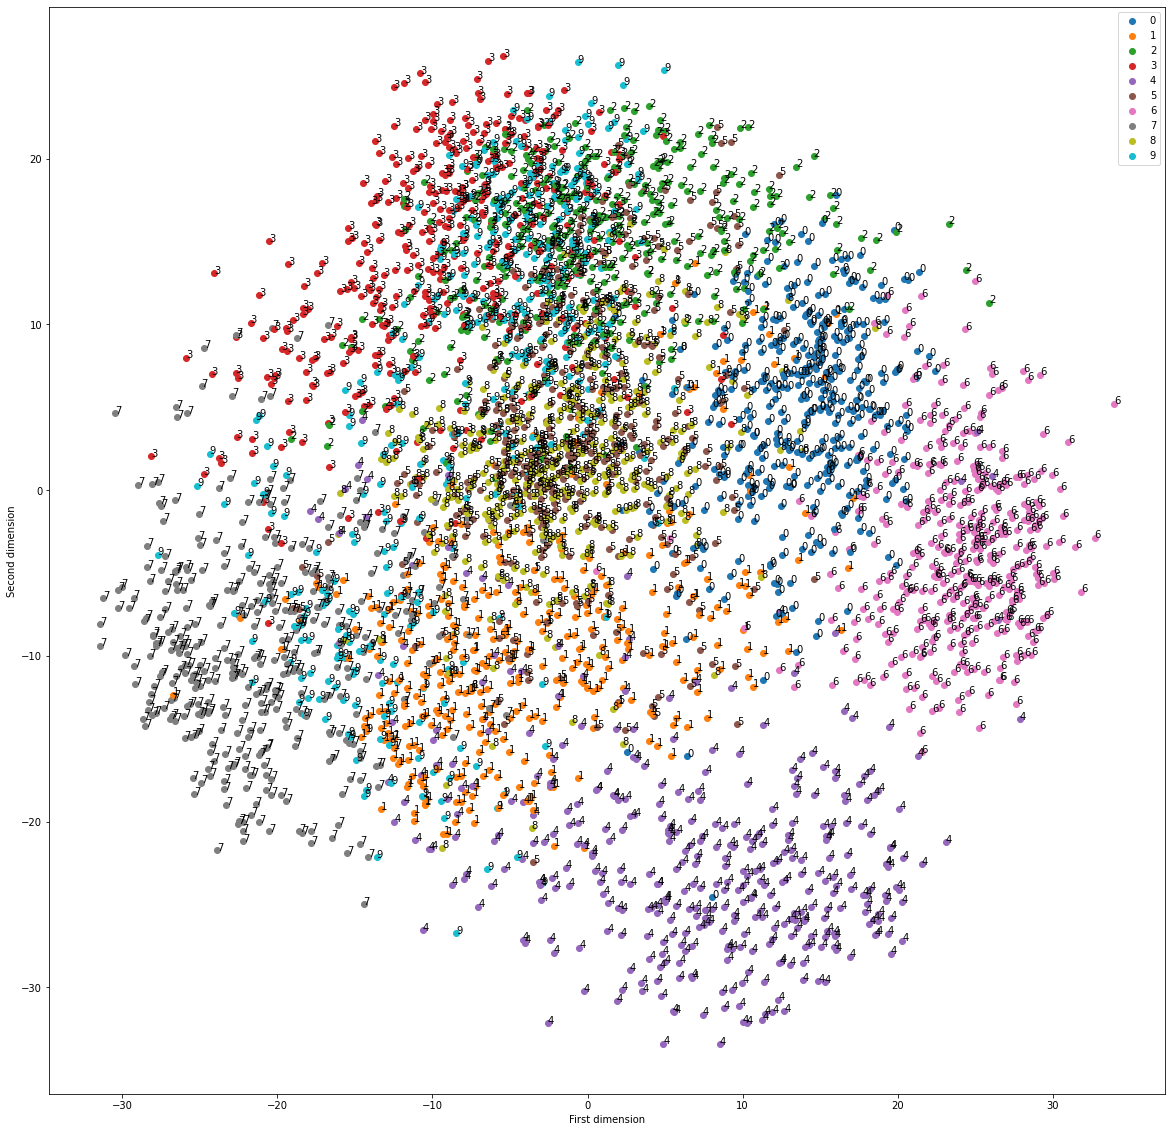

In [44]:
print(filtered_data)
plot_data(filtered_data,y_train)

<b>Question 3</b> [3pts] : Implement LDA (Linear Discriminant Analysis) algorithm yourself. Reduce the dimensionality of the training set by means of computing the parameters required by LDA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

In [45]:
#Compute the within class and between class scatter matrices.
#Compute the eigenvectors and corresponding eigenvalues for the scatter matrices.
#Find overall mean
#Sort the eigenvalues and select the top k.
class LDA:
    def __init__(self):
        self.means=None
        self.components=None
    def fit(self,x_train,y_train):
        no_of_features=x_train.shape[1]
        self.means=np.zeros((no_of_features,no_of_features))
        B_Class=np.zeros((no_of_features,no_of_features))
        W_Class=np.zeros((no_of_features,no_of_features))
        for i in np.unique(y_train):
            self.means[i]=np.mean(x_train[y_train==i],axis=0)
            matrix=np.zeros((no_of_features,no_of_features))
            for row in x_train[y_train==i]:
                row=row.reshape((no_of_features,1))
                mean=self.means[i].reshape((no_of_features,1))
                matrix+=((row-mean).dot((row-mean).T))
            W_Class+=matrix
        overall_mean=np.mean(x_train,axis=0)
        overall_mean=mean.reshape((no_of_features,1))
        for i in np.unique(y_train):
            mean_i=self.means[i].reshape((no_of_features,1))
            n=len(x_train[y_train==i])
            B_Class+=(n*(mean_i-overall_mean).dot((mean_i-overall_mean).T))
        ei_values,ei_vectors=np.linalg.eig(np.dot(np.linalg.inv(W_Class),B_Class))
        ei_vectors=ei_vectors.real
        self.components=ei_vectors[:,ei_values.argsort()[::-1]]
    def transform(self,x_train,n_components=2):
        a=self.components[:,:n_components]
        return np.dot(x_train,a)

[[ 0.8844963   1.43516326]
 [ 0.8414734   1.88669463]
 [-0.69237591 -0.93500155]
 ...
 [-2.22830717  0.83868329]
 [-2.22590947  1.09567942]
 [ 0.68052351 -0.82019077]]


<Figure size 432x288 with 0 Axes>

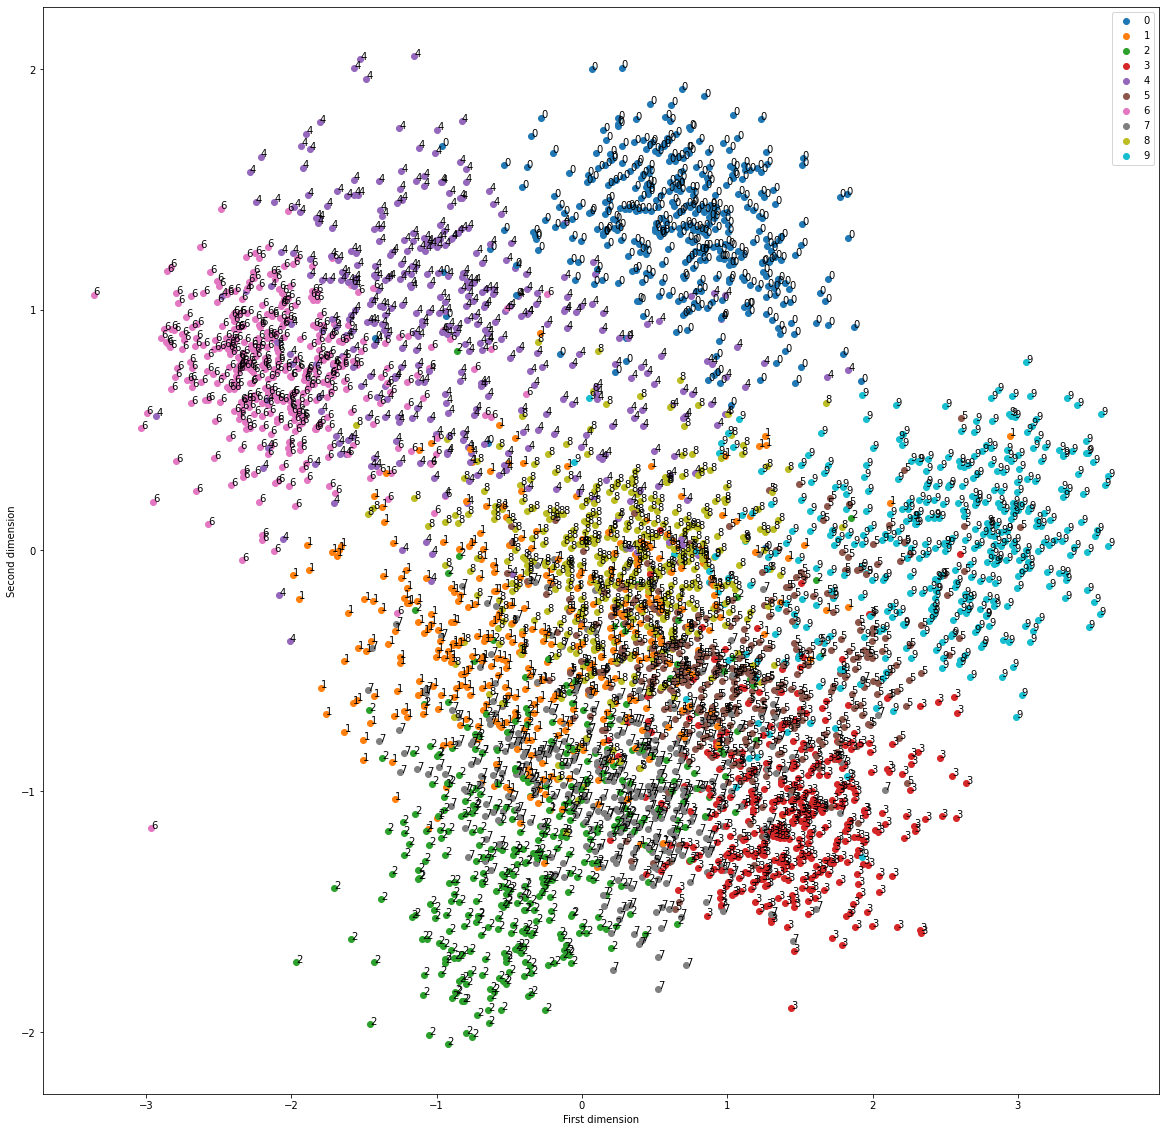

In [46]:
lda=LDA()
lda.fit(px_train,y_train)
filtered_data=lda.transform(px_train)
print(filtered_data)
plot_data(filtered_data,y_train)

<b>Question4</b> [3pts]: (use a library) Use knn (k nearest neighbor) classification algorithm with k=3, 5, 15 to predict the class labels (0, 1, 2, …, 9) for the original test set (in 64 dimensions) using the original training set as the training dataset. Compute the confusion matrix and also the test error for each class (0, 1, 2, ….,9) on the test dataset. 

In [47]:
#Implemented KNN Classification Algorithm using python library

def KNN_Classifier(x_train,y_train,x_test,y_test,n_neighbors):
    print("Input dimension:",x_train.shape[1])
    e_data=[]
    for i in n_neighbors:
        classifier=KNeighborsClassifier(n_neighbors=i)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        print("Confusion matrix for k={0}:\n".format(i),confusion_matrix(y_test,y_pred))
        print("\n"*2)
        error=[]
        for l in np.unique(y_test):
            error.append(1-accuracy_score(y_test[y_test==l],y_pred[y_test==l]))
        e_data.append(error)
    df=pd.DataFrame(np.transpose(e_data),columns=["K="+str(i) for i in n_neighbors])
    print("Test error for each class:")
    print(df)
    print("\n"*3)

In [48]:
KNN_Classifier(x_train,y_train,x_test,y_test,n_neighbors=[3,5,15])

Input dimension: 64
Confusion matrix for k=3:
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   4 173   0   0   0   0   0   0   0]
 [  0   0   0 181   0   0   0   1   1   0]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   1   1 179   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 172   1   6]
 [  0   9   0   1   0   0   0   0 162   2]
 [  0   0   0   4   0   1   0   0   1 174]]



Confusion matrix for k=5:
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   1   0   0   0]
 [  0   3 174   0   0   0   0   0   0   0]
 [  0   1   0 178   0   1   0   1   2   0]
 [  0   1   0   0 179   0   0   0   1   0]
 [  0   0   0   0   1 180   0   0   0   1]
 [  0   0   0   0   0   1 180   0   0   0]
 [  0   0   0   0   0   0   0 173   1   5]
 [  0   8   0   2   0   1   0   0 162   1]
 [  0   0   0   2   1   1   0   0   2 174]]



Confusion matrix for k=15:
 [[178   0   0   0   0   0   0 

<b>Question 5 </b> [3pts]: Repeat Q4) but use <br/>
Q5a) [1pts] PCA projected test set (PCA parameters computed on the training set) in 2, 5, 9 dimensions. <br/> 

In [50]:
print("PCA projected test set in 2 dimensions")
KNN_Classifier(pca.transform(px_train,2),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=2),y_test,n_neighbors=[3,5,15])
print("PCA projected test set in 5 dimensions")
KNN_Classifier(pca.transform(px_train,5),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=5),y_test,n_neighbors=[3,5,15])
print("PCA projected test set in 9 dimensions")
KNN_Classifier(pca.transform(px_train,9),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=9),y_test,n_neighbors=[3,5,15])

PCA projected test set in 2 dimensions
Input dimension: 2
Confusion matrix for k=3:
 [[134   9   5   0   2   8  12   0   8   0]
 [ 20 122   2   0   3  12   1   7   5  10]
 [  5  10  82  31   1  15   0   0   5  28]
 [  0   0  37 104   0  12   0   7   2  21]
 [  1  14   0   2 161   1   2   0   0   0]
 [ 10  34  36  10   2  39   0   0  44   7]
 [ 19   3   0   0   5   0 154   0   0   0]
 [  0  34   3   5   7   7   0 107   1  15]
 [  8  46  19  10   1  31   0   2  50   7]
 [  1  15  60  39   4  12   0  10   6  33]]



Confusion matrix for k=5:
 [[139   3   8   0   2   9  11   0   6   0]
 [ 22 117   4   0   5  12   0  11   6   5]
 [  4   9  84  37   0  13   0   0  10  20]
 [  0   0  31 114   1   9   0   8   7  13]
 [  0  15   0   2 162   0   1   0   0   1]
 [  9  29  30   6   2  47   0   1  52   6]
 [ 20   2   0   0   4   0 155   0   0   0]
 [  0  34   1   4   6   5   0 118   1  10]
 [  7  44  10   4   0  37   0   2  59  11]
 [  0  13  47  41   4  21   0  12   6  36]]



Confusion matrix for

<b>Question 5b) </b> [1pts] LDA projected test set (LDA parameters computed on the training set) in 2, 5, 9 dimensions 

In [51]:
print("LDA projected test set in 2 dimensions")
KNN_Classifier(lda.transform(px_train,2),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=2),y_test,n_neighbors=[3,5,15])
print("LDA projected test set in 5 dimensions")
KNN_Classifier(lda.transform(px_train,5),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=5),y_test,n_neighbors=[3,5,15])
print("LDA projected test set in 9 dimensions")
KNN_Classifier(lda.transform(px_train,9),y_train,pca.transform(data_Preprocess.transform(x_test),n_components=9),y_test,n_neighbors=[3,5,15])

LDA projected test set in 2 dimensions
Input dimension: 2
Confusion matrix for k=3:
 [[  7   0   0   3   0   0   1   0   0 167]
 [  4   0 121  14   0   0  15   0   0  28]
 [ 66   0   9   0  74   0  18   0   0  10]
 [ 20   1   0   0  89   0  72   0   0   1]
 [  0   0  41 134   0   0   3   0   0   3]
 [ 37   3  26  16  31   0  53   2   0  14]
 [  0   0   0   6   0   0   0   0   0 175]
 [  0   0  69   0   0   0 110   0   0   0]
 [ 22   2  48   6  31   0  49   4   0  12]
 [ 16   1  21   0 115   0  27   0   0   0]]



Confusion matrix for k=5:
 [[  8   0   0   3   1   0   0   0   0 166]
 [  4   0 125  14   0   0  11   0   0  28]
 [ 63   0   9   0  77   0  19   0   0   9]
 [ 17   1   0   0  87   0  77   0   0   1]
 [  0   0  41 133   0   0   3   0   0   4]
 [ 34   3  25  16  32   0  54   3   0  15]
 [  0   0   0   6   0   0   0   0   0 175]
 [  0   0  75   0   0   0 104   0   0   0]
 [ 21   3  49   5  30   1  48   5   0  12]
 [ 14   1  21   0 109   0  35   0   0   0]]



Confusion matrix for

<b>Question 5 c)</b> Does using PCA or LDA help with the test error of the knn? If so, for which classes does it help most?

No. It does not reduce the test error of KNN Using PCA or LDA.